<a href="https://colab.research.google.com/github/CalebMitchel/Imse-441/blob/main/Copy_of_IMSE_441_Final_Project(CPM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the final project, you need to demonstrate your data analytics skills from data understanding, cleaning, descriptive statsistics, visualization and statistical analysis. Your final project should be a clean code and proper markdown. 

- Information about data:-
    >experience_level: 
    - SE: Senior level
    - MI: medium level
    - EN: Entry level
    - EX: Executive level

    >employment_type: 
    - FT(Full-Time)
    - PT(Part-Time)
    - CT(Contract)
    - FL(Freelance)
    
    >company_size: 
    - L large
    - M Medium
    - S Small

1. Import the dataset 'ds_salaries' from github and find out data types. Mention what are the categorical and numerical columns present. Perform data cleaning if needed.
2. Display the column names and # of unique values in each column. Write 2 lines to show your understanding from the unique values (you can choose for any 2 columns).
3. Drop the columns 'salary_currency','employee_residence' & 'remote_ratio' from your data set. Evaluate how many 'Analytics Engineer' are present in the dataset, mention the mean salary for this job title ? Construct a bar plot of salaries for this job profile
4. Construct a histogram of 'salary' for the entire dataset, from the graph comment on salary range for most people.
5. Create a pie plot for 'job_title' and mention the category with highest # of peeople.
6. How many people have salary > 400000 [Hint: you can use '>' sign as a condition]. Display the first 2 rows of those people
7. Do a boxplot for 'salary' in each year. Mention the median value of salary each year.
8. Use a bar/pie plot and label clearly to answer the following
  >a) What %of people have executive level of experience

  >b) What %of people are employed in Large size company

  >c) What %of people in 'USA' have part time jobs
9. Using bar plot try to visualize (label clearly )
  > a) employment_type' vs 'company_location
  
  > b)'company_size' vs 'company_location'

  >c) 'employment_type' vs 'experience_level'

10. Plot a histogram for age, check if it is a normal distribution. Create a 96% CI in 'age', perform ttesting to see if 30 is an acceptable mean value of age or not based on 96% CI. 
11. Construct a Simple Linear Regression Model (build the equation) for 'age' and 'salary' data. Find the regression coefficients, assume x = 'age' and y ='salary'. [This is a toy dataset and has no resemblance with reality]. 


1)

In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.power import TTestIndPower

import scipy as scipy
from scipy import stats
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
%pip install pingouin
import pingouin as pg
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
!pip install pingouin
import pingouin as pg
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=133d7ffea8377f657aa47f226a0cf6ec9735bcc591af33af136b89a7ce3e66d6
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/ds_salaries.csv"
df = pd.read_csv(url)
df

,year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,EUR,ES,100,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USD,US,100,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USD,US,100,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USD,CA,100,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USD,CA,100,USA,M,48
...,...,...,...,...,...,...,...,...,...,...,...
110,2022,EN,PT,Machine Learning Engineer,54000,CHF,CH,100,EUR,S,42
111,2023,SE,PT,Data Scientist,150000,USD,US,0,EUR,M,51
112,2023,SE,PT,Data Scientist,120000,USD,US,0,EUR,M,39
113,2023,SE,PT,Analytics Engineer,289800,USD,US,0,EUR,M,36


In [4]:
df= df.dropna()
df

,year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,EUR,ES,100,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USD,US,100,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USD,US,100,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USD,CA,100,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USD,CA,100,USA,M,48
...,...,...,...,...,...,...,...,...,...,...,...
110,2022,EN,PT,Machine Learning Engineer,54000,CHF,CH,100,EUR,S,42
111,2023,SE,PT,Data Scientist,150000,USD,US,0,EUR,M,51
112,2023,SE,PT,Data Scientist,120000,USD,US,0,EUR,M,39
113,2023,SE,PT,Analytics Engineer,289800,USD,US,0,EUR,M,36


In [5]:
df.dtypes

year                   int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
age                    int64
dtype: object

int64 = numerical, object = Categorical

2)

In [6]:
df['salary_currency'].nunique()

5

In [7]:
df.groupby('salary_currency').size()

salary_currency
CHF      1
EUR      4
HKD      1
INR      1
USD    108
dtype: int64

In [8]:
df['job_title'].nunique()

15

In [9]:
df.groupby('job_title').size()

job_title
Analytics Engineer                 6
Applied Scientist                  8
Business Intelligence Engineer     4
Computer Vision Engineer           4
Data Analyst                      10
Data Architect                     2
Data Engineer                     30
Data Modeler                       2
Data Scientist                    29
Data Strategist                    2
ML Engineer                        2
Machine Learning Engineer          8
Principal Data Scientist           1
Research Engineer                  6
Research Scientist                 1
dtype: int64

3)

In [10]:
#remove the columns not required 
df = df.drop(['salary_currency','employee_residence','remote_ratio'],axis=1)
df

,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
0,2023,SE,FT,Principal Data Scientist,80000,USA,L,44
1,2023,MI,CT,ML Engineer,30000,USA,S,51
2,2023,MI,CT,ML Engineer,25500,USA,S,27
3,2023,SE,FT,Data Scientist,175000,USA,M,54
4,2023,SE,FT,Data Scientist,120000,USA,M,48
...,...,...,...,...,...,...,...,...
110,2022,EN,PT,Machine Learning Engineer,54000,EUR,S,42
111,2023,SE,PT,Data Scientist,150000,EUR,M,51
112,2023,SE,PT,Data Scientist,120000,EUR,M,39
113,2023,SE,PT,Analytics Engineer,289800,EUR,M,36


In [11]:
Regular=(df[df['job_title']=='Analytics Engineer']['salary'])
Regular

23     230000
24     143200
103    152500
104    116450
113    289800
114    214000
Name: salary, dtype: int64

In [12]:
m = Regular.mean()
m

190991.66666666666

<Axes: >

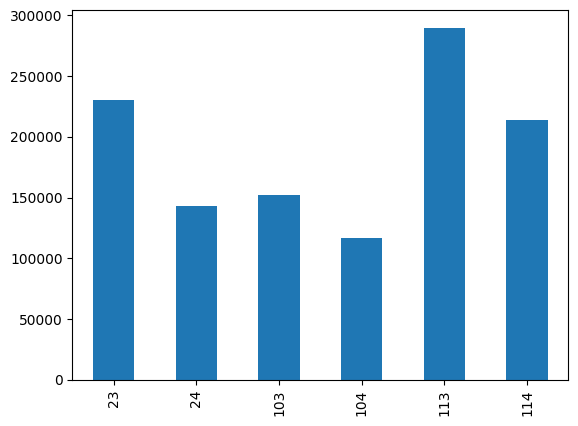

In [13]:
Regular.plot(kind='bar')

4)

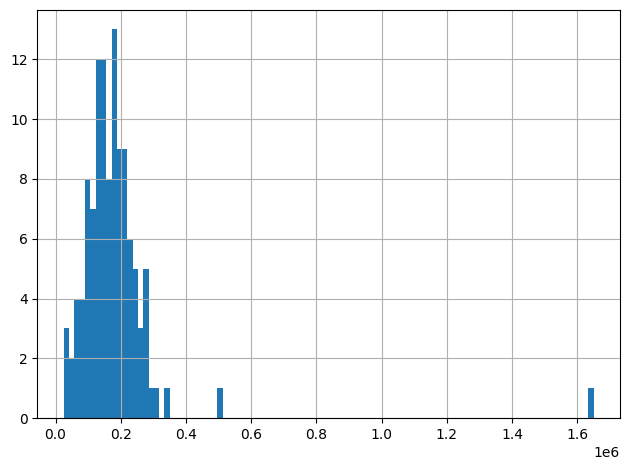

In [14]:
df['salary'].hist(bins=100)
plt.tight_layout()
plt.show()

5)

In [15]:
p = df.groupby('job_title').size()
p

job_title
Analytics Engineer                 6
Applied Scientist                  8
Business Intelligence Engineer     4
Computer Vision Engineer           4
Data Analyst                      10
Data Architect                     2
Data Engineer                     30
Data Modeler                       2
Data Scientist                    29
Data Strategist                    2
ML Engineer                        2
Machine Learning Engineer          8
Principal Data Scientist           1
Research Engineer                  6
Research Scientist                 1
dtype: int64

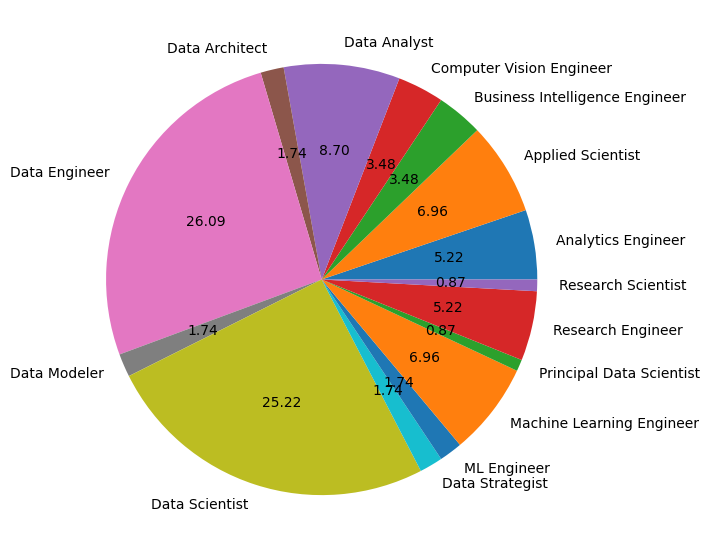

In [16]:
p.plot(kind='pie', labels=['Analytics Engineer', 'Applied Scientist', 'Business Intelligence Engineer', 'Computer Vision Engineer', 'Data Analyst', 'Data Architect', 'Data Engineer', 'Data Modeler', 'Data Scientist', 'Data Strategist', 'ML Engineer', 'Machine Learning Engineer', 'Principal Data Scientist', 'Research Engineer', 'Research Scientist'], 
       autopct='%.2f', fontsize=10, figsize=(7, 7));

Data Engineer is the highest amount of people.

6)

In [17]:
Sal=df[df['salary']>400000]
print(len(Sal))
Sal

2


,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
39,2022,MI,FL,Machine Learning Engineer,1650000,USA,L,57
78,2023,MI,FL,Data Scientist,510000,USA,L,32


7)

<Axes: title={'center': 'salary'}, xlabel='[year]'>

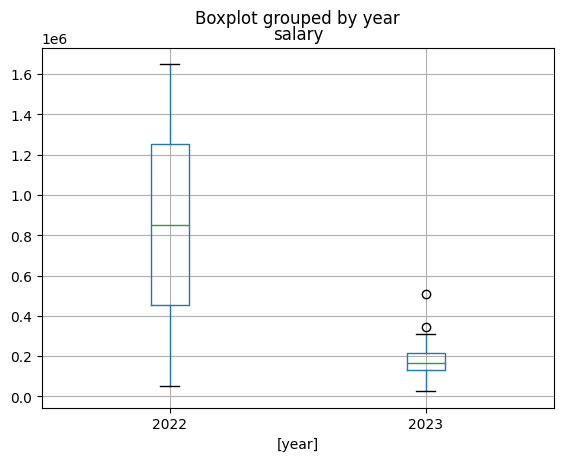

In [23]:
df.boxplot(column=['salary'], by=['year'])

8)A) 1.74% in the Executive category

In [ ]:
XP=df.groupby('experience_level').size()
XP

experience_level
EN     8
EX     2
MI    11
SE    94
dtype: int64

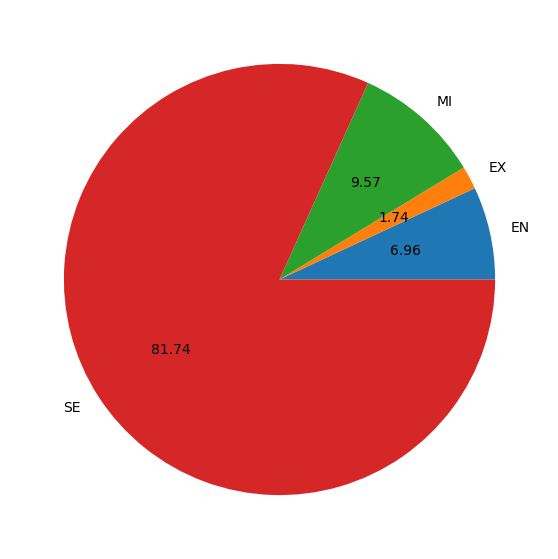

In [ ]:
XP.plot(kind='pie', labels=['EN', 'EX', 'MI', 'SE'], 
       autopct='%.2f', fontsize=10, figsize=(7, 7));

B) 13.04% of the people are in a Large company

In [ ]:
df['company_size'].nunique()

3

In [ ]:
L=df.groupby('company_size').size()
L

company_size
L    15
M    97
S     3
dtype: int64

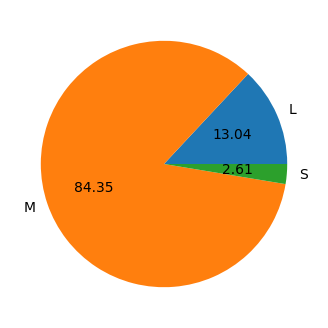

In [ ]:
L.plot(kind='pie', labels=['L','M','S'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

C) 13.64% of Americans are Part Time workers

In [ ]:
df['company_location'].nunique()

2

In [ ]:
g = df[df['employment_type'] == 'PT']
print(len(g))
g

22


,year,experience_level,employment_type,job_title,salary,company_location,company_size,age
63,2023,SE,PT,Data Engineer,176000,EUR,M,52
64,2023,SE,PT,Data Engineer,237000,EUR,M,46
65,2023,SE,PT,Data Engineer,201450,EUR,M,53
66,2023,SE,PT,Applied Scientist,309400,EUR,L,43
67,2023,SE,PT,Applied Scientist,159100,EUR,L,25
89,2023,SE,PT,Data Scientist,105000,USA,M,48
90,2023,SE,PT,Data Scientist,70000,USA,M,48
91,2023,EN,PT,Machine Learning Engineer,163196,USA,M,53
92,2023,EN,PT,Machine Learning Engineer,145885,EUR,M,34
93,2023,SE,PT,Data Engineer,217000,EUR,M,29


In [ ]:
Loc=g.groupby('company_location').size()
Loc

company_location
EUR    19
USA     3
dtype: int64

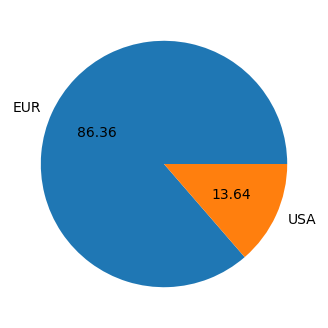

In [ ]:
Loc.plot(kind='pie', labels=['EUR','USA',], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

9) A)

<Axes: xlabel='employment_type'>

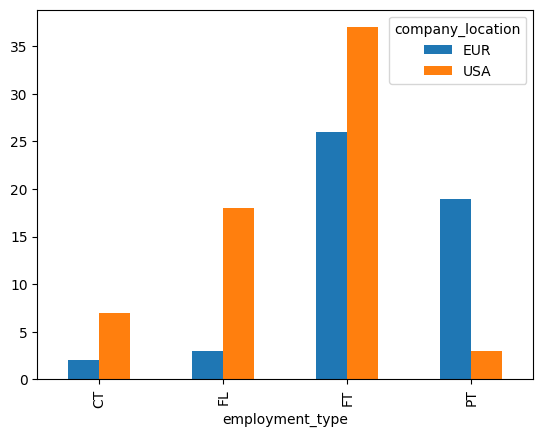

In [28]:
d= df.groupby(['employment_type','company_location']).size().unstack()
d.plot(kind = 'bar')

B)

<Axes: xlabel='company_size'>

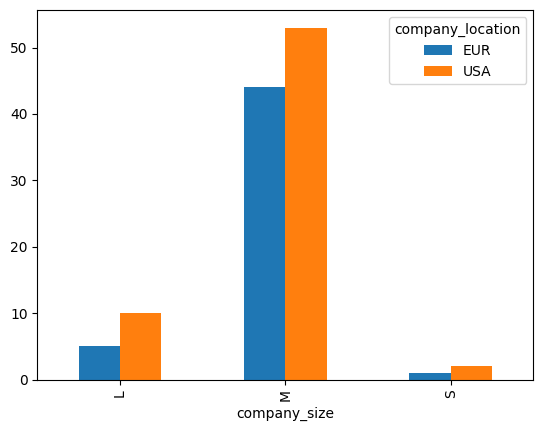

In [29]:
n= df.groupby(['company_size','company_location']).size().unstack()
n.plot(kind = 'bar')

C)

<Axes: xlabel='employment_type'>

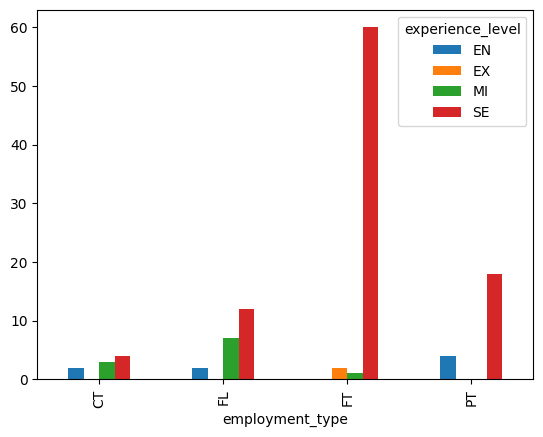

In [30]:
n= df.groupby(['employment_type','experience_level']).size().unstack()
n.plot(kind = 'bar')

10) 30 is not an acceptable mean

<Axes: ylabel='Frequency'>

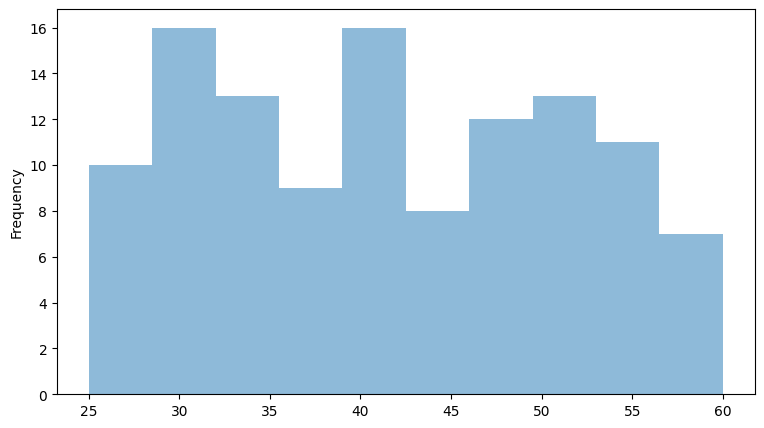

In [31]:
df['age'].plot(kind = 'hist',figsize =(9,5), alpha = 0.5)

In [32]:
age=df['age']

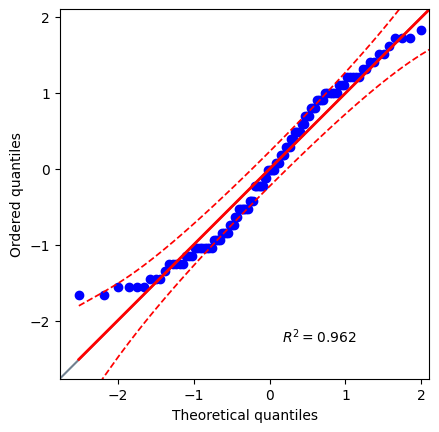

In [33]:
pg.qqplot(age)
plt.show()

In [34]:
CI= stats.ttest_1samp(df['age'],40).confidence_interval(confidence_level=0.96)
CI

ConfidenceInterval(low=39.281757281509634, high=43.08346010979471)

In [35]:
stats.ttest_1samp(df['age'],30)

TtestResult(statistic=12.221906042968829, pvalue=1.8352675934333261e-22, df=114)

11)

In [36]:
x=df[['age']]
y=df['salary']
x

,age
0,44
1,51
2,27
3,54
4,48
...,...
110,42
111,51
112,39
113,36


In [37]:
model = lm.LinearRegression()
model.fit(x,y)

LinearRegression()

In [38]:
print('Coefficients: ', model.coef_)
print("y-intercept ", model.intercept_)
     

Coefficients:  [1540.13479365]
y-intercept  118586.24015009381


Y= 1540.1348x + 118586.24015